In [21]:
import pandas as pd
JPE = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/3_consolidation/merged_all_master.xlsx') 
print(JPE.shape)


(22790, 41)


In [23]:
#AER

JPE.rename(columns={"authors_master": "authors"}, inplace= True)
JPE.rename(columns={"year_master": "year"}, inplace= True)
JPE = JPE[['Journal_Name' ,'Authors_count', 'Authors_list', 'authors', 'Article_ID', 'content_type',
'stable_url', 'year', 'Ref_type' ,
'ref_string', 'ref_string_clean1', 'Screened', 'Manual',
'0_Auth_affs_0', '0_Auth_affs_1', '0_Auth_affs_2', '0_Auth_affs_3', '0_Auth_affs_4', 
'1_Auth_affs_0' , '1_Auth_affs_1', '1_Auth_affs_2', '1_Auth_affs_3', '1_Auth_affs_4',
'2_Auth_affs_0', '2_Auth_affs_1', '2_Auth_affs_2', '2_Auth_affs_3', '2_Auth_affs_4',
'3_Auth_affs_0', '3_Auth_affs_1', '3_Auth_affs_2', '3_Auth_affs_3', '3_Auth_affs_4',
'4_Auth_affs_0', '4_Auth_affs_1', '4_Auth_affs_2' , '4_Auth_affs_3',
'5_Auth_affs_0',
'6_Auth_affs_0','7_Auth_affs_0']]

In [24]:
melted = JPE.melt(id_vars= ['Article_ID','year'], value_vars=['0_Auth_affs_0', '0_Auth_affs_1', '0_Auth_affs_2', '0_Auth_affs_3', '0_Auth_affs_4', 
                                '1_Auth_affs_0' , '1_Auth_affs_1', '1_Auth_affs_2', '1_Auth_affs_3', '1_Auth_affs_4',
                                '2_Auth_affs_0', '2_Auth_affs_1', '2_Auth_affs_2', '2_Auth_affs_3', '2_Auth_affs_4',
                                '3_Auth_affs_0', '3_Auth_affs_1', '3_Auth_affs_2', '3_Auth_affs_3', '3_Auth_affs_4',
                                '4_Auth_affs_0', '4_Auth_affs_1', '4_Auth_affs_2' , '4_Auth_affs_3',
                                '5_Auth_affs_0',
                                '6_Auth_affs_0','7_Auth_affs_0']).dropna()

melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)

melted = melted.sort_values(by=['year'])

print(melted.head())
print(melted.shape)

       Article_ID  year     Aff number  \
0         2967475  1940  0_Auth_affs_0   
18580     1807579  1940  0_Auth_affs_0   
18579     1807578  1940  0_Auth_affs_0   
18578     1807577  1940  0_Auth_affs_0   
18577     1807576  1940  0_Auth_affs_0   

                                        Affiliation  
0      Cambridge Massachusetts United States (City)  
18580                  University Of North Carolina  
18579                         Brookings Institution  
18578                            Harvard University  
18577                        Washington, D.C (City)  
(37788, 4)


In [27]:
print(len(melted.Affiliation.unique()))
print(melted.shape)

unique = pd.DataFrame(melted.Affiliation.unique())

unique.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/3_consolidation/Uniques/unique.xlsx') 

#df = pd.dataframe()
#df['column_name']=pd.Series(melted.Affiliation.unique())

3632
(37788, 4)


In [6]:
melted['aff_cum_counts'] = melted.groupby(['Affiliation']).cumcount()+1

melted = melted[['Article_ID' ,'Aff number', 'Affiliation','year', 'aff_cum_counts']]
melted.head()



In [7]:
mask_journal = melted['Affiliation'].isin(['National Bureau Of Economic Research'])
melted = melted[~mask_journal]

# Checking the top 20 occurances of Universities over the 70 years
highest_vals = melted.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
9366,27871269,0_Auth_affs_0,Harvard University,2010.0,1686
9406,27804958,0_Auth_affs_0,University Of Chicago,2010.0,1336
9397,27871244,0_Auth_affs_0,Massachusetts Institute Of Technology,2010.0,1201
9396,27871243,0_Auth_affs_0,Stanford University,2010.0,1022
9365,27871268,0_Auth_affs_0,Princeton University,2010.0,901
9357,27871260,0_Auth_affs_0,Northwestern University,2010.0,764
9407,27804959,0_Auth_affs_0,University Of Pennsylvania,2010.0,762
9307,657949,0_Auth_affs_0,Yale University,2010.0,747
9363,27871266,0_Auth_affs_0,UCB,2010.0,612
2614,40835861,0_Auth_affs_0,Columbia University,2010.0,609


(71, 5)
      Article_ID     Aff number         Affiliation    year  aff_cum_counts
2617     1883343  0_Auth_affs_0  Harvard University  1940.0              15
2675     1884123  0_Auth_affs_0  Harvard University  1941.0              25
5605     1824641  0_Auth_affs_0  Harvard University  1942.0              32
2724     1882755  0_Auth_affs_0  Harvard University  1943.0              38
2757     1883321  0_Auth_affs_0  Harvard University  1944.0              43
        Article_ID     Aff number         Affiliation    year  aff_cum_counts
9173        507155  0_Auth_affs_0  Harvard University  2006.0            1484
119307    25098850  1_Auth_affs_0  Harvard University  2007.0            1521
9779      29730139  0_Auth_affs_0  Harvard University  2008.0            1581
2550      40247629  0_Auth_affs_0  Harvard University  2009.0            1624
9366      27871269  0_Auth_affs_0  Harvard University  2010.0            1686
(71, 5)


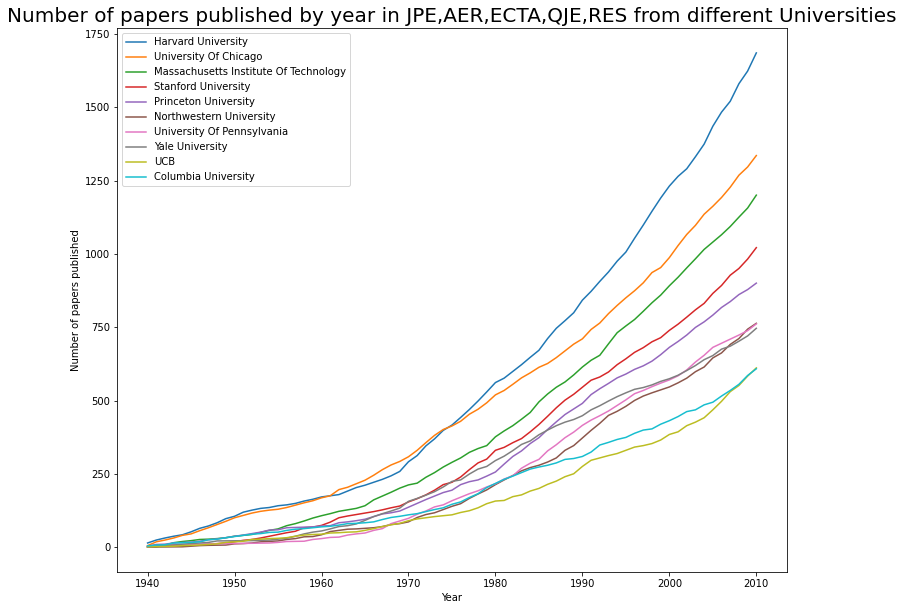

In [8]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#print(melted.head())

a = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
print(a.shape)
print(a.head())
print(a.tail())
b = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
print(b.shape)
c = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
#plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in JPE,AER,ECTA,QJE,RES from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()

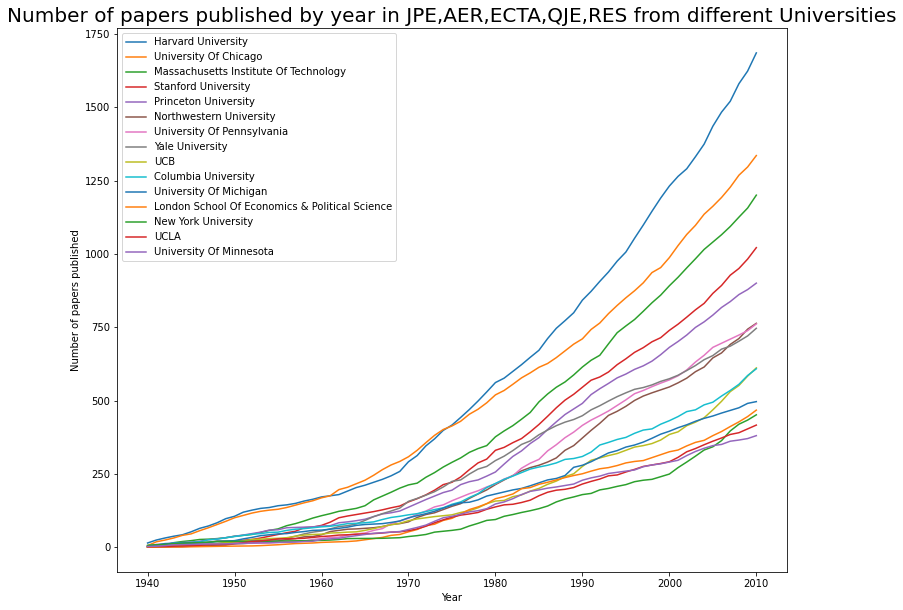

In [10]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#print(melted.head())

a = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
b = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
c = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')
l = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[11,2])].drop_duplicates(subset = ['year'], keep = 'last')
m = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[12,2])].drop_duplicates(subset = ['year'], keep = 'last')
n = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[13,2])].drop_duplicates(subset = ['year'], keep = 'last')
o = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[14,2])].drop_duplicates(subset = ['year'], keep = 'last')
p = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[15,2])].drop_duplicates(subset = ['year'], keep = 'last')

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])
plt.plot(l['year'],l['aff_cum_counts'], label = highest_vals_10.iat[11,2])
plt.plot(m['year'],m['aff_cum_counts'], label = highest_vals_10.iat[12,2])
plt.plot(n['year'],n['aff_cum_counts'], label = highest_vals_10.iat[13,2])
plt.plot(o['year'],o['aff_cum_counts'], label = highest_vals_10.iat[14,2])
#plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in JPE,AER,ECTA,QJE,RES from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()